# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

------------------------------------------------------------
Used cars are usually priced based on their Manufacturer, Make, Model, Transmission type, Year, Mileage etc. The professionals from car industry who understands the used car business, know the market and experts of pricing are usually tasked to come-up with the price of the cars. 

Our goal is to make a **Regression Model** which can effectively predict the price of the used cars, based on historical data. The Model should be validated and have minimum error margin. In order to build the Model, collect the used car data and get a better understanding on the most relevant features that can help determine the price of a used car.

------------------------------------------------------------

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

**Steps to be taken for undertsanding the data:**
* Load the dataset
* Check the shape of the data and display some rows
* Check data information - data types, non-null counts
* Check and drop duplicate rows, if any
* Identify columns that seems important for the model, drop the rest
* Identify columns that has missing values, check count of missing values
* Check for the outliers

In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from warnings import filterwarnings 
filterwarnings('ignore')

In [2]:
# Read the vehicles data from the CSV file
used_vehicles = pd.read_csv('data/vehicles.csv')

In [3]:
# Check the shape of the dataset
used_vehicles.shape

(426880, 18)

In [4]:
# Display random 10 rows from the dataset
used_vehicles.sample(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
264603,7310377392,albany,0,2013.0,kia,sportage,NaN,NaN,gas,98956.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,ny
297171,7307710503,columbus,1500,1980.0,chevrolet,c60,NaN,NaN,other,155000.0,clean,other,NaN,NaN,NaN,NaN,NaN,oh
196662,7316218069,detroit metro,13400,2013.0,buick,enclave premium awd,excellent,6 cylinders,gas,121000.0,clean,automatic,NaN,4wd,mid-size,SUV,brown,mi
233063,7312880629,charlotte,26985,2013.0,jeep,wrangler unlimited sahara,like new,6 cylinders,gas,84978.0,clean,automatic,NaN,4wd,full-size,SUV,black,nc
104067,7307545118,okaloosa / walton,14900,1976.0,ford,f-250,good,8 cylinders,gas,162000.0,clean,manual,NaN,4wd,full-size,pickup,white,fl
305727,7312293040,oklahoma city,18998,2015.0,audi,a3,NaN,NaN,gas,57206.0,clean,automatic,WAUCJGFFXF1129359,fwd,NaN,NaN,red,ok
366420,7316374850,beaumont / port arthur,37990,2016.0,chevrolet,camaro ss coupe 2d,good,8 cylinders,gas,9704.0,clean,other,1G1FF1R79G0140582,rwd,NaN,coupe,red,tx
184488,7315613607,frederick,5900,2007.0,toyota,rav4 limited awd,excellent,6 cylinders,gas,206847.0,clean,automatic,NaN,4wd,NaN,NaN,silver,md
43844,7313257326,orange county,23500,2015.0,mercedes-benz,gla,NaN,4 cylinders,gas,33875.0,clean,automatic,NaN,4wd,compact,SUV,grey,ca
180207,7308794157,maine,19900,1993.0,gmc,sierra 3500,fair,6 cylinders,diesel,215000.0,clean,automatic,NaN,4wd,full-size,truck,brown,me


In [5]:
# Display dataset column info
used_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [6]:
# describe the dataset to view the stats of the numeric features
used_vehicles.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


**Observations**
* We can see from above stats that there is a big gap between the max and the 75 percentile of each price/odometer. 
* Similarly, there is a big gap between the min and the 25 percentile in year/price/odometer.
* These large gaps form the outliers and should be removed during Data Preparation phase.

In [7]:
# Count of Unique Values
used_vehicles.nunique()

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

In [8]:
# Check Missing Count
used_vehicles.isnull().sum().sort_values(ascending=False)

size            306361
cylinders       177678
condition       174104
VIN             161042
drive           130567
paint_color     130203
type             92858
manufacturer     17646
title_status      8242
model             5277
odometer          4400
fuel              3013
transmission      2556
year              1205
id                   0
region               0
price                0
state                0
dtype: int64

In [9]:
# Display the missing values as percentage of total rows
used_vehicles.isna().sum()/used_vehicles.shape[0]*100

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

**Observations:** 
* We can see above that missing values in columns ['year', 'manufacturer', 'model', 'odometer', 'title_status'] are less than 5% so we can simply drop them during Data Preparation phase without reducing the size of the dataset by a bigger number

In [10]:
# Check duplicate values. 
# Since some columns like id, region, state have all unique values, we need to check duplicates again later
used_vehicles.duplicated().sum()

0

In [11]:
# Display statistics for the numerical features
used_vehicles.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


**Observations:**
* We can see above that our dataset has lot of outliers in numerical features. Outliers affect the accuracy of the model, so we need to find them and remove from the dataset during the Data Preparation phase. 
* There is data from 1900 which might be irrelevant for our model so we can remove anything prior to 1990 to keep it relevant. 

In [12]:
# Check the price outliers and set the upper and lower limit for data cleaning
price_percentile25 = used_vehicles['price'].quantile(0.25)
price_percentile75 = used_vehicles['price'].quantile(0.75)
price_interqr = price_percentile75 - price_percentile25

# Let's set the upper price as 1.5 times of interquartile above the 75 percentile and lower limit as 10 percentile
price_max = price_percentile75 + (1.5 * price_interqr)
price_min = used_vehicles['price'].quantile(0.10)

In [13]:
# Check the odometer outliers and set the upper and lower limit for data cleaning
odometer_percentile75 = used_vehicles['odometer'].quantile(0.75)
odometer_percentile25 = used_vehicles['odometer'].quantile(0.25)
odometer_interqr = odometer_percentile75 - odometer_percentile25

# Let's set the max odometer as 1.5 times of interquartile above the 75 percentile and lower limit as 5 percentile
odometer_max = odometer_percentile75 + (1.5 * odometer_interqr)
odometer_min = used_vehicles['odometer'].quantile(0.05)

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [14]:
# Drop columns that aren't going to be helpful in creating the model
used_vehicles.drop(['id', 'VIN', 'size'], axis=1, inplace=True)

In [15]:
# Fill missing values with Mode Imputation method
used_vehicles['drive'] = used_vehicles['drive'].fillna(used_vehicles['drive'].value_counts().index[0])
used_vehicles['type'] = used_vehicles['type'].fillna(used_vehicles['type'].value_counts().index[0])
used_vehicles['paint_color'] = used_vehicles['paint_color'].fillna(used_vehicles['paint_color'].value_counts().index[0])


In [16]:
# Let's check the values of 'title_status' column for various range of odometer readings
ot_bins = [0, 30000, 60000, 90000, 115000, 150000, 1000000]
ot_groups = used_vehicles.groupby(['title_status', pd.cut(used_vehicles.odometer, ot_bins)])
ot_groups.size().unstack()

odometer,"(0, 30000]","(30000, 60000]","(60000, 90000]","(90000, 115000]","(115000, 150000]","(150000, 1000000]"
title_status,,,,,,
clean,79356,66573,62145,55273,63428,72389
lien,244,216,294,212,224,226
missing,204,85,84,146,90,173
parts only,44,16,9,27,28,57
rebuilt,1125,1644,1603,994,1013,822
salvage,526,598,637,490,680,913


**Observations**
* Most of the values of 'title_status' are clean, so we can update “clean” to all the NaN values of this column

In [17]:
# Let's check the values of 'condition' column for various range of odometer readings
oc_bins = [0, 30000, 60000, 90000, 115000, 150000, 1000000]
oc_groups = used_vehicles.groupby(['condition', pd.cut(used_vehicles.odometer, oc_bins)])
oc_groups.size().unstack()

odometer,"(0, 30000]","(30000, 60000]","(60000, 90000]","(90000, 115000]","(115000, 150000]","(150000, 1000000]"
condition,,,,,,
excellent,8924,13132,17970,18396,21424,19282
fair,340,218,421,706,1124,3856
good,40400,23806,13987,9752,12485,20530
like new,4752,3992,3566,3061,3292,2460
new,789,131,103,69,102,98
salvage,46,51,47,82,96,257


**Observations**
* It seems we can derive the value of vehicle condition using odometer range
* It would be a fair assumption to update condition with missing value as 'excellent' for odometer range of 60K to 150K and 'good' for range less than 60K or more than 150K

In [18]:
# Update the missing condition values using odometer range
cond1 = (used_vehicles['odometer'] > 60000) & (used_vehicles['odometer'] <= 150000)
cond2 = (used_vehicles['odometer'] <= 60000) | (used_vehicles['odometer'] > 150000)

used_vehicles.loc[cond1, 'condition'] = used_vehicles.loc[cond1, 'condition'].fillna('excellent')
used_vehicles.loc[cond2, 'condition'] = used_vehicles.loc[cond2, 'condition'].fillna('good')

In [19]:
# Drop columns identified during Data Understanding phase with missing values less than 5%
used_vehicles = used_vehicles.dropna(subset=['year', 'manufacturer', 'model', 'odometer', 'title_status'])

In [20]:
# Column 'drive' and 'cylinders' seems to be related in vehicle and missing value of one can be derived from another
# In this case, we will derive the missing value for 'cylinders' using 'drive'
used_vehicles.groupby(['drive', 'cylinders']).cylinders.count()

drive  cylinders   
4wd    10 cylinders      684
       12 cylinders       24
       3 cylinders       196
       4 cylinders     24399
       5 cylinders       481
       6 cylinders     51280
       8 cylinders     43820
       other             410
fwd    10 cylinders        9
       12 cylinders        4
       3 cylinders       316
       4 cylinders     42529
       5 cylinders       901
       6 cylinders     21258
       8 cylinders      1226
       other             220
rwd    10 cylinders      609
       12 cylinders       80
       3 cylinders        19
       4 cylinders      4583
       5 cylinders       150
       6 cylinders     14713
       8 cylinders     21393
       other             173
Name: cylinders, dtype: int64

In [21]:
# Replace NaN/Missing value using following disctionary object
cyl_values = {'4wd':'6 cylinders',
             'fwd':'4 cylinders',
             'rwd':'8 cylinders'}
used_vehicles.loc[used_vehicles['cylinders'].isna(),
                  'cylinders'] = used_vehicles.loc[used_vehicles['cylinders'].isna(),
                                                   'drive'].map(lambda x: cyl_values[x])


In [22]:
# Replacing the missing values with 'unknown' 
used_vehicles.fillna('unknown', inplace=True)

In [23]:
# Check duplicate values
used_vehicles.duplicated().sum()

51356

In [24]:
# Drop duplicate values
used_vehicles = used_vehicles.drop_duplicates(keep = 'first')

In [25]:
# Check current number of rows and columns
used_vehicles.shape

(341354, 15)

In [26]:
manufacturer_values = used_vehicles['manufacturer'].value_counts()
print(manufacturer_values)

ford               59145
chevrolet          45543
toyota             28562
honda              17766
jeep               15594
nissan             15487
ram                14338
gmc                14038
bmw                12639
dodge              10866
mercedes-benz       9929
hyundai             8309
volkswagen          8208
subaru              8074
lexus               7064
kia                 6855
audi                6724
cadillac            5778
acura               5423
chrysler            4975
buick               4690
mazda               4603
infiniti            4290
lincoln             3697
volvo               2880
mitsubishi          2790
mini                2046
pontiac             1993
jaguar              1802
rover               1551
porsche             1158
mercury              992
saturn               922
alfa-romeo           859
tesla                785
fiat                 691
harley-davidson      121
ferrari               69
datsun                61
aston-martin          22


In [27]:
model_values = used_vehicles['model'].value_counts()
print(model_values[:50])

f-150                 6427
silverado 1500        4139
1500                  3335
silverado             2501
camry                 2501
accord                2463
civic                 2359
escape                2236
2500                  2235
wrangler              2152
altima                2151
explorer              2070
tacoma                2035
grand cherokee        2028
mustang               1878
corolla               1755
equinox               1615
cr-v                  1586
fusion                1550
focus                 1474
corvette              1460
tahoe                 1404
malibu                1364
rav4                  1349
impala                1338
grand caravan         1334
sierra 1500           1325
sonata                1324
silverado 2500hd      1283
outback               1278
3500                  1265
cruze                 1241
odyssey               1240
charger               1227
prius                 1216
f-250                 1215
jetta                 1185
e

**There are many manufacturer and models. We are interested in only top 30 manufacturer and top 50 model. Rest can be updated as 'others'**

In [28]:
# Keep top 30 manufacturer names as-is and replace the rest with 'others'
used_vehicles['manufacturer'] = used_vehicles['manufacturer'].apply(lambda x: x if str(x) in manufacturer_values[:30] 
                                                                    else 'others')


In [29]:
# Keep top 50 model names as-is and replace the rest with 'others'
used_vehicles['model'] = used_vehicles['model'].apply(lambda x: x if str(x) in model_values[:50] 
                                                      else 'others')


In [30]:
# Print the count of values in each column
for i in used_vehicles.columns:
    print(i, len(used_vehicles[i].value_counts().index))

region 404
price 14796
year 107
manufacturer 31
model 51
condition 6
cylinders 8
fuel 6
odometer 100655
title_status 6
transmission 4
drive 3
type 13
paint_color 12
state 51


**Handling Outliers**

<Axes: xlabel='year', ylabel='Density'>

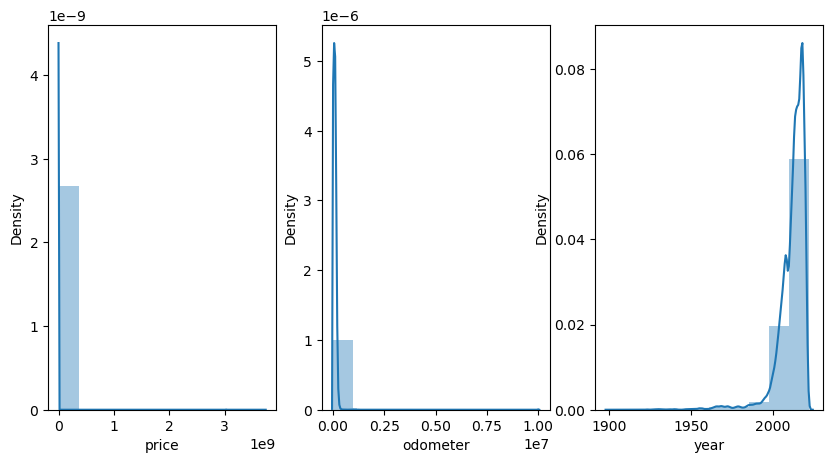

In [31]:
# First let's visualize the outliers for price, odometer and year
plt.figure(figsize=[10,5])
plt.subplot(131)
sns.distplot(used_vehicles['price'], bins = 10)
plt.subplot(132)
sns.distplot(used_vehicles['odometer'], bins = 10)
plt.subplot(133)
sns.distplot(used_vehicles['year'], bins = 10)

<Axes: xlabel='year'>

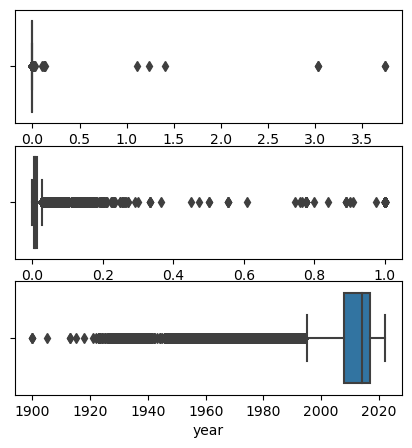

In [32]:
# Let's use boxplot to visualize the outliers for price, odometer and year
plt.figure(figsize=[5,5])
plt.subplot(311)
sns.boxplot(x=used_vehicles['price'])
plt.subplot(312)
sns.boxplot(x=used_vehicles['odometer'])
plt.subplot(313)
sns.boxplot(x=used_vehicles['year'])

In [33]:
# Remove the price, odometer and year outliers
used_vehicles = used_vehicles[(used_vehicles['price'] < price_max) & (used_vehicles['price'] > price_min)]
used_vehicles = used_vehicles[(used_vehicles['odometer'] < odometer_max) & (used_vehicles['odometer'] > odometer_min)]

# Remove data prior to year 1950
used_vehicles = used_vehicles[used_vehicles['year'] > 1950]

<Axes: xlabel='year'>

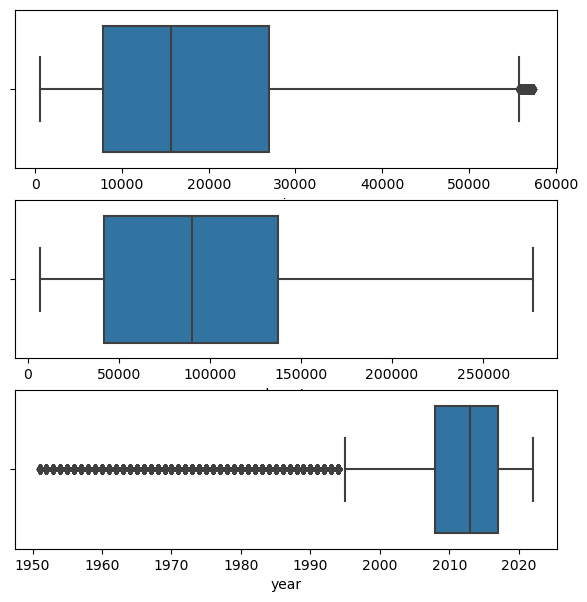

In [34]:
# Let's visualize again after removing the outliers
plt.figure(figsize=[7, 7])
plt.subplot(311)
sns.boxplot(x=used_vehicles['price'])
plt.subplot(312)
sns.boxplot(x=used_vehicles['odometer'])
plt.subplot(313)
sns.boxplot(x=used_vehicles['year'])

In [35]:
# display the dataset stats
used_vehicles.describe()

,price,year,odometer
count,291011.000000,291011.000000,291011.000000
mean,18189.798396,2011.377566,94983.029360
std,12379.619705,7.870101,59691.444407
min,501.000000,1951.000000,6319.000000
25%,7800.000000,2008.000000,42000.000000
50%,15700.000000,2013.000000,90108.000000
75%,26990.000000,2017.000000,137260.000000
max,57341.000000,2022.000000,277231.000000


In [36]:
# Convert the odometer and year to 'int' datatype
used_vehicles['odometer'] = used_vehicles['odometer'].astype(int)
used_vehicles['year'] = used_vehicles['year'].astype(int)


In [37]:
# Display the missing values as percentage of total rows
used_vehicles.isna().sum()/used_vehicles.shape[0]*100

region          0.0
price           0.0
year            0.0
manufacturer    0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
type            0.0
paint_color     0.0
state           0.0
dtype: float64

### Data Visualization

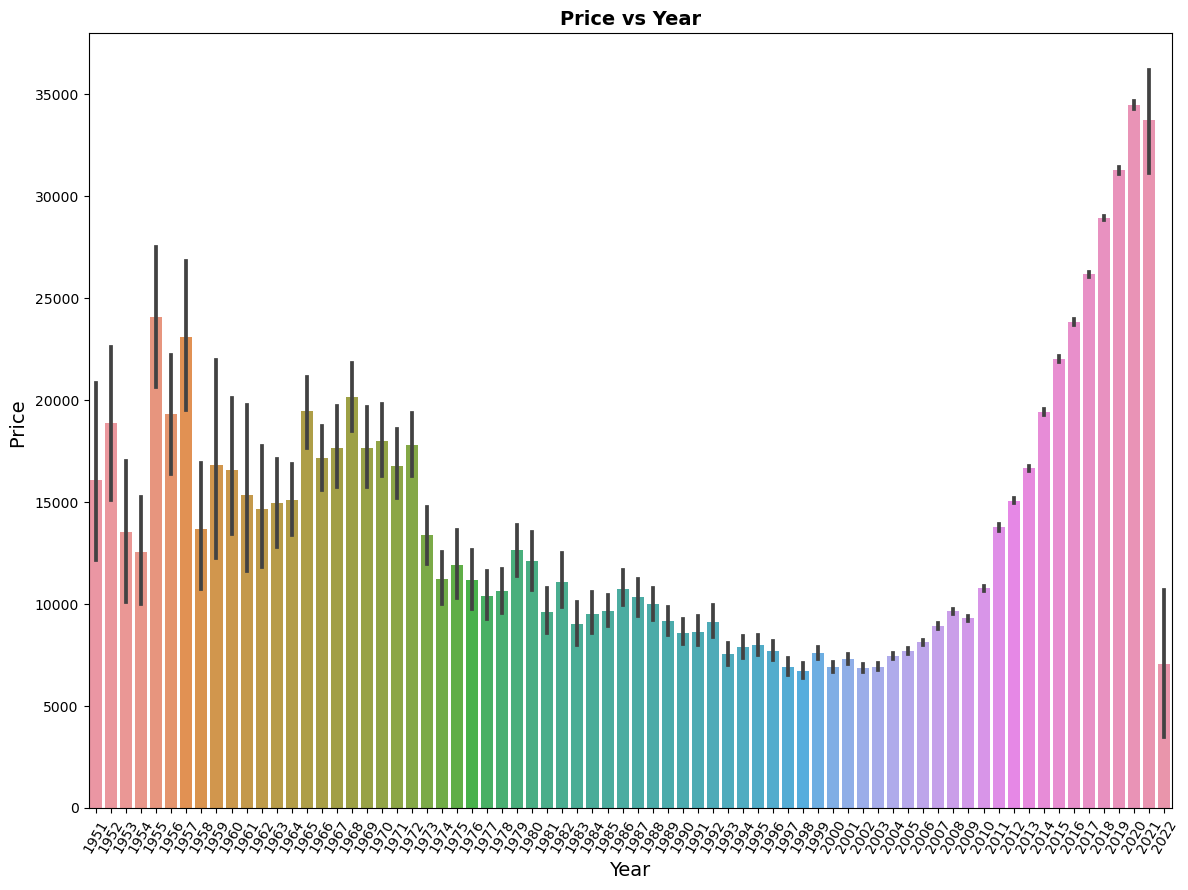

In [38]:
# Let's visualize the price vs year
plt.figure(figsize =(12,9))
sns.barplot(y=used_vehicles['price'],x=used_vehicles['year'])
plt.title("Price vs Year",fontsize=14,fontweight ='bold')
plt.xlabel('Year',fontsize = 14)
plt.xticks(rotation=60)
plt.ylabel('Price ',fontsize = 14)
plt.tight_layout()
plt.show()

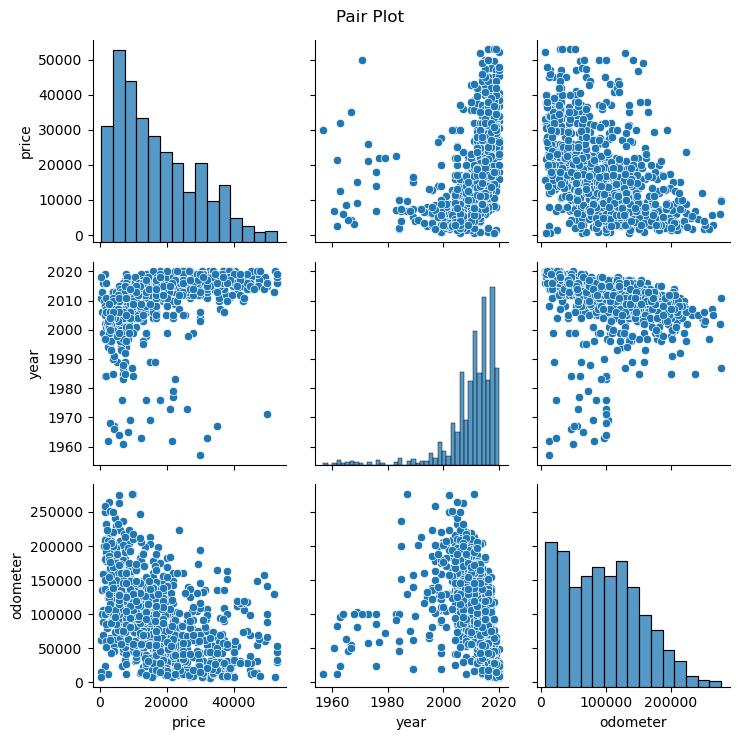

In [39]:
# Take a sample of 1000 vehicles and visualize it using pair plot
vehicle_samples = used_vehicles.sample(1000)
sns.pairplot(vehicle_samples)
plt.suptitle('Pair Plot')
plt.tight_layout()
plt.show()

<Axes: >

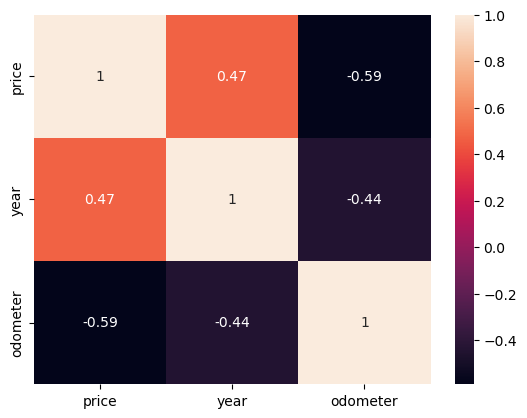

In [40]:
# Correlation matrix heatmap
sns.heatmap(used_vehicles.corr(), annot=True)

**Observations**
* As expected, odometer is negatively correlated to price of the vehicle i.e. as the odometer increases, the price of the vehicle decreases.
* At the same time, odometer and year of the vehicle are also negatively correlated. This means the odometer/mileage increases as the car gets older.
* We can see vehicle's year is positively correlated to the price of the used vehicle which makes sense as the prices are usually higher for latest models of vehicles.

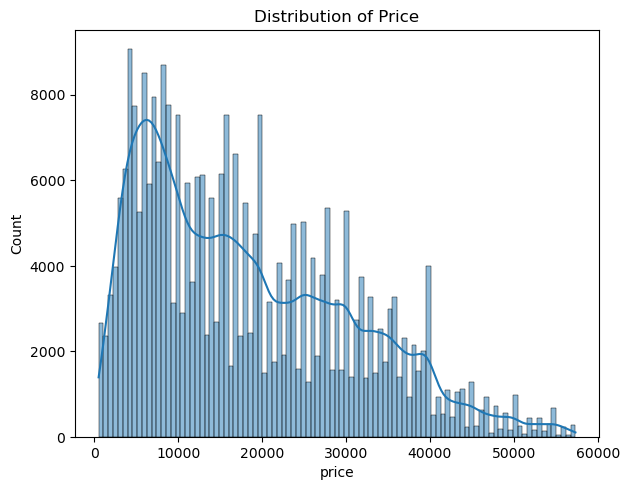

In [41]:
# Let's visualize the distribution of the price
sns.histplot(used_vehicles.price, kde=True)
plt.tight_layout()
plt.title("Distribution of Price")
plt.show()

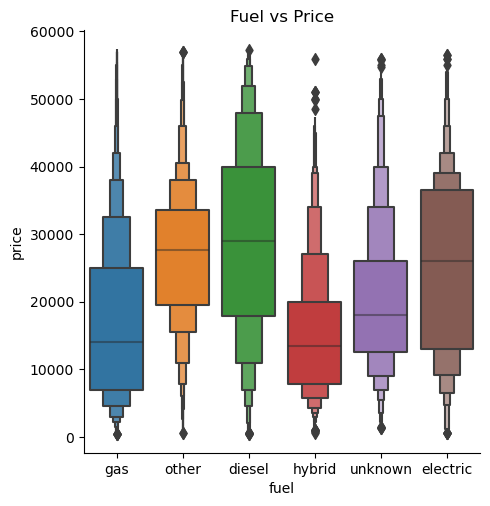

In [42]:
# Fuel vs Price plot
sns.catplot(x="fuel", y="price", kind="boxen", data=used_vehicles).set(title='Fuel vs Price')

**Observations**
* Above plot shows the Price range of the used cars for various fuel types.
* For example - Gas cars are in 5K to 30K, Diesel in 12K to 50K, Electric in 10K to 35K etc.

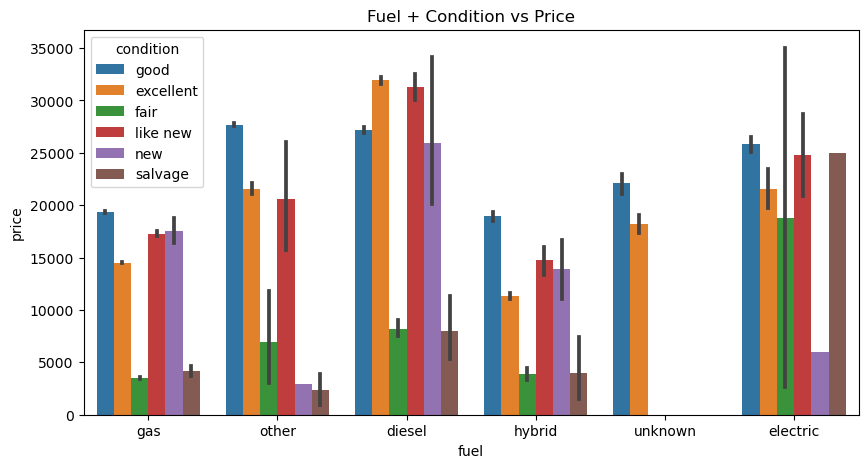

In [43]:
# Fuel + Condition vs Price bar plot
plt.figure(figsize=(10,5))
sns.barplot(x='fuel',y='price',hue='condition',data=used_vehicles)
plt.title('Fuel + Condition vs Price')
plt.show()

**Observations**
* Diesel vehicles are the best sellers
* Excellent and Like New vehicles in Diesel are usually sold for highest price

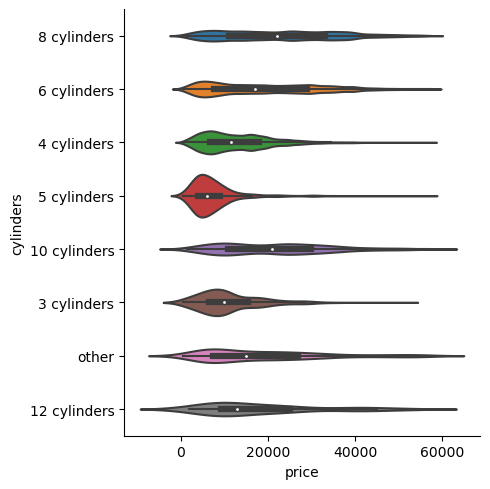

In [44]:
# cyclinders vs price plot
sns.catplot(y="cylinders", x="price",kind = "violin", data=used_vehicles)

**Observations**
* As expected, cars with higher number of cylinders are usually more expensive than their counterparts.

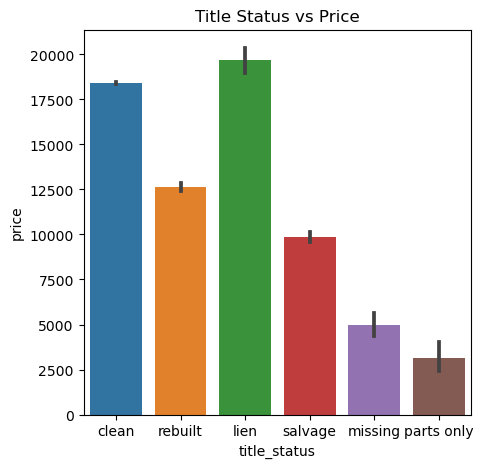

In [45]:
# Title Status vs Price bar plot
fig,axs=plt.subplots()
fig.set_size_inches(5,5)
p1=sns.barplot(x='title_status',y='price',data=used_vehicles,ax=axs)
axs.set_title('Title Status vs Price')
plt.show()

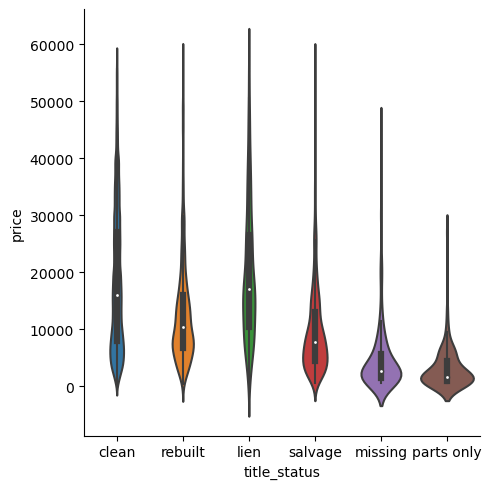

In [46]:
# violin plot for title_status vs price
sns.catplot(x="title_status", y="price",kind="violin", data=used_vehicles)

**Observation**
* Used vehicles with 'lien' and 'clean' status are usally sold for higher price compared to rest of title statuses.

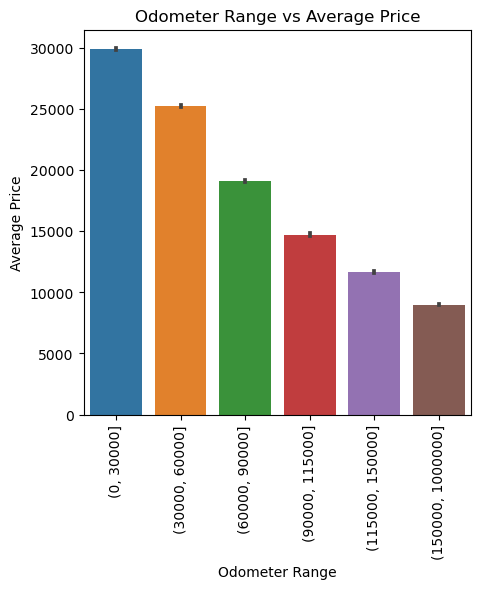

In [47]:
# Get the average price for various odometer ranges
odometer_df = used_vehicles.copy()
op_bins = [0, 30000, 60000, 90000, 115000, 150000, 1000000]
odometer_df['odometer_range'] = pd.cut(used_vehicles.odometer, op_bins)
op_groups = odometer_df.groupby(['odometer_range']).agg({'price': ['mean']})

# Odometer Range vs Average Price bar plot
fig,axs=plt.subplots()
fig.set_size_inches(5,5)
p1=sns.barplot(x='odometer_range',y='price',data=odometer_df,ax=axs)
axs.set_title('Odometer Range vs Average Price')
plt.xticks(rotation = (90))
plt.xlabel("Odometer Range")
plt.ylabel("Average Price")
plt.show()

**Observations**
* As expected, used cars with low miles fetches higher price.
* The average used price for car with mile between 0 to 30K mile is around \$30K
* The average price drops to almost more than half once a cars accumulate miles 90K or above.

In [48]:
# Import the required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [49]:
# Let's put the target column (price) at the end of the dataset
columns = ['region', 'state', 'year', 'manufacturer', 'model', 'condition','cylinders', 'fuel', 'odometer', 
           'title_status', 'transmission','drive', 'type', 'paint_color', 'price']
used_vehicles = used_vehicles.reindex(columns = columns )

In [50]:
# Create a new copy of the dataframe
used_vehicles_final = used_vehicles.copy()

In [51]:
used_vehicles_final.head()

,region,state,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,price
27,auburn,al,2014,gmc,others,good,8 cylinders,gas,57923,clean,other,4wd,pickup,white,33590
28,auburn,al,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229,clean,other,4wd,pickup,blue,22590
29,auburn,al,2020,chevrolet,others,good,8 cylinders,gas,19160,clean,other,4wd,pickup,red,39590
30,auburn,al,2017,toyota,others,good,8 cylinders,gas,41124,clean,other,4wd,pickup,red,30990
31,auburn,al,2013,ford,others,excellent,6 cylinders,gas,128000,clean,automatic,rwd,truck,black,15000


In [52]:
used_vehicles_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291011 entries, 27 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        291011 non-null  object
 1   state         291011 non-null  object
 2   year          291011 non-null  int32 
 3   manufacturer  291011 non-null  object
 4   model         291011 non-null  object
 5   condition     291011 non-null  object
 6   cylinders     291011 non-null  object
 7   fuel          291011 non-null  object
 8   odometer      291011 non-null  int32 
 9   title_status  291011 non-null  object
 10  transmission  291011 non-null  object
 11  drive         291011 non-null  object
 12  type          291011 non-null  object
 13  paint_color   291011 non-null  object
 14  price         291011 non-null  int64 
dtypes: int32(2), int64(1), object(12)
memory usage: 33.3+ MB


In [53]:
# Out of 13 columns, 10 columns are categorical. 
# Apply the Label encoder to each categorical feature 
cat_features = ['region', 'state', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 
                'transmission', 'drive', 'type', 'paint_color'] 
encoder = LabelEncoder() 
encoded_df = used_vehicles_final[cat_features].apply(encoder.fit_transform)
used_vehicles_final.drop(cat_features, axis=1, inplace=True)
used_vehicles_final = pd.concat([encoded_df,used_vehicles_final],axis = 1) 
used_vehicles_final.head(5)

,region,state,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,type,paint_color,year,odometer,price
27,16,1,9,31,2,6,2,0,2,0,8,10,2014,57923,33590
28,16,1,5,42,2,6,2,0,2,0,8,1,2010,71229,22590
29,16,1,5,31,2,6,2,0,2,0,8,8,2020,19160,39590
30,16,1,28,31,2,6,2,0,2,0,8,8,2017,41124,30990
31,16,1,8,31,0,5,2,0,0,2,10,0,2013,128000,15000


In [54]:
# Create Training and Test data
X = used_vehicles_final.iloc[:,:-1]
y = used_vehicles_final.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = .2)

In [55]:
# Let's do some Feature Scaling
scalerX = StandardScaler()

X_train2 = pd.DataFrame(scalerX.fit_transform(X_train))
X_test2 = pd.DataFrame(scalerX.transform(X_test)) 

# Assign column names to the new Scaled DataFrame
X_train2.columns = X_train.columns.values 
X_test2.columns = X_test.columns.values 

# Assign index to the new Scaled DataFrame
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values 

# Keep X_train and X_test as the training and test dataset
X_train = X_train2
X_test = X_test2

In [56]:
print('Training Data Shape',X_train.shape)
print('Test Data Shape',X_test.shape)

Training Data Shape (232808, 14)
Test Data Shape (58203, 14)


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [57]:
# Import the required libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

In [58]:
# Define a function to calculate the error scores for the prediction model
def error_result(y_test, y_pred):
    result=[]
    result.append('%.4f' % r2_score(y_test,y_pred))
    result.append('%.4f' % (r2_score(y_test,y_pred)*100))
    result.append('%.2f' % mean_squared_error(y_test, y_pred))
    result.append('%.2f' % mean_absolute_error(y_test, y_pred))
    result.append('%.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
    
    return (result)

In [59]:
# Dataframe to store the performance of various models
score_df = pd.DataFrame(index=['R2 Score', 'Accuracy(%)', 'Mean Squared Error', 'Mean Absolute Error', 'Root MSE'])

### Linear Regression Model

In [60]:
# Create Linear Regressor, fit and predict
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)
y_pred_lr = LR_model.predict(X_test)

In [61]:
# Display the scores for the Linear Regression model
score_lr = error_result(y_test, y_pred_lr)
score_df['Linear Regression'] = score_lr
print('Error Scores for Linear Regression:')
print('R2_score: ', score_lr[0])
print('Mean squared error: ', score_lr[2])
print('Mean absolute error: ', score_lr[3])
print('Root mean squared error: ', score_lr[4])

Error Scores for Linear Regression:
R2_score:  0.5499
Mean squared error:  68873318.26
Mean absolute error:  6237.59
Root mean squared error:  8299.00


### Ridge Regression Model

In [62]:
# Create Ridge Regressor, fit and predict
RR_model = Ridge(alpha=20, solver='auto')
RR_model.fit(X_train, y_train)
y_pred_rr = RR_model.predict(X_test)

In [63]:
# Display the scores for the Ridge Regression model
score_rr = error_result(y_test, y_pred_rr)
score_df['Ridge Regression'] = score_rr
print('Error Scores for Ridge Regression:')
print('R2_score: ', score_rr[0])
print('Mean squared error: ', score_rr[2])
print('Mean absolute error: ', score_rr[3])
print('Root mean squared error: ', score_rr[4])

Error Scores for Ridge Regression:
R2_score:  0.5499
Mean squared error:  68873240.09
Mean absolute error:  6237.59
Root mean squared error:  8298.99


### Lasso Regression Model

In [64]:
# Create Lasso Regressor, fit and predict
LS_model = Lasso(alpha=0.01)
LS_model.fit(X_train, y_train)
y_pred_ls = LS_model.predict(X_test)

In [65]:
# Display the scores for the Lasso Regression model
score_ls = error_result(y_test, y_pred_ls)
score_df['Lasso Regression'] = score_ls
print('Error Scores for Lasso Regression:')
print('R2_score: ', score_ls[0])
print('Mean squared error: ', score_ls[2])
print('Mean absolute error: ', score_ls[3])
print('Root mean squared error: ', score_ls[4])

Error Scores for Lasso Regression:
R2_score:  0.5499
Mean squared error:  68873317.12
Mean absolute error:  6237.59
Root mean squared error:  8298.99


### Random Forest Regression Model

In [66]:
# Create Random Forest Regressor, fit and predict
RFR_model = RandomForestRegressor(n_estimators=50, random_state=0)
RFR_model.fit(X_train, y_train)
y_pred_rfr = RFR_model.predict(X_test)

In [67]:
# Display the scores for the Random Forest Regression model
score_rfr = error_result(y_test, y_pred_rfr)
score_df['Random Forest Regression'] = score_rfr
print('Error Scores for Random Forest Regression:')
print('R2_score: ', score_rfr[0])
print('Mean squared error: ', score_rfr[2])
print('Mean absolute error: ', score_rfr[3])
print('Root mean squared error: ', score_rfr[4])

Error Scores for Random Forest Regression:
R2_score:  0.8790
Mean squared error:  18518437.27
Mean absolute error:  2385.11
Root mean squared error:  4303.31


**Tuning of Hyper-parameters**

In [68]:
# define grid parameters, fit the data using best model and predict
param_grid = {'n_estimators':[100, 200, 300]}
RFR_model2 = RandomForestRegressor(random_state=0)
grid_search = GridSearchCV(estimator=RFR_model2, param_grid = param_grid, cv = 3, n_jobs = -1, verbose =2)

grid_search.fit(X_train, y_train)
grid_search.best_params_

best_model = grid_search.best_estimator_
y_pred_bm = best_model.predict(X_test)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


In [69]:
# Display the scores for the tuned model
score_bm = error_result(y_test, y_pred_bm)
score_df['Tuned Random Forest Regression'] = score_bm
print('Error Scores for Tuned Random Forest Regression:')
print('R2_score: ', score_bm[0])
print('Mean squared error: ', score_bm[2])
print('Mean absolute error: ', score_bm[3])
print('Root mean squared error: ', score_bm[4])

Error Scores for Tuned Random Forest Regression:
R2_score:  0.8818
Mean squared error:  18086857.53
Mean absolute error:  2347.97
Root mean squared error:  4252.86


### Performance of All Models

In [70]:
score_df

,Linear Regression,Ridge Regression,Lasso Regression,Random Forest Regression,Tuned Random Forest Regression
R2 Score,0.5499,0.5499,0.5499,0.8790,0.8818
Accuracy(%),54.9909,54.9909,54.9909,87.8981,88.1801
Mean Squared Error,68873318.26,68873240.09,68873317.12,18518437.27,18086857.53
Mean Absolute Error,6237.59,6237.59,6237.59,2385.11,2347.97
Root MSE,8299.00,8298.99,8298.99,4303.31,4252.86


In [71]:
# Change the datatype of score_df columns to float
for i in score_df.columns:
    score_df[i] = score_df[i].astype(float)
model_accuracy = score_df.loc['Accuracy(%)']

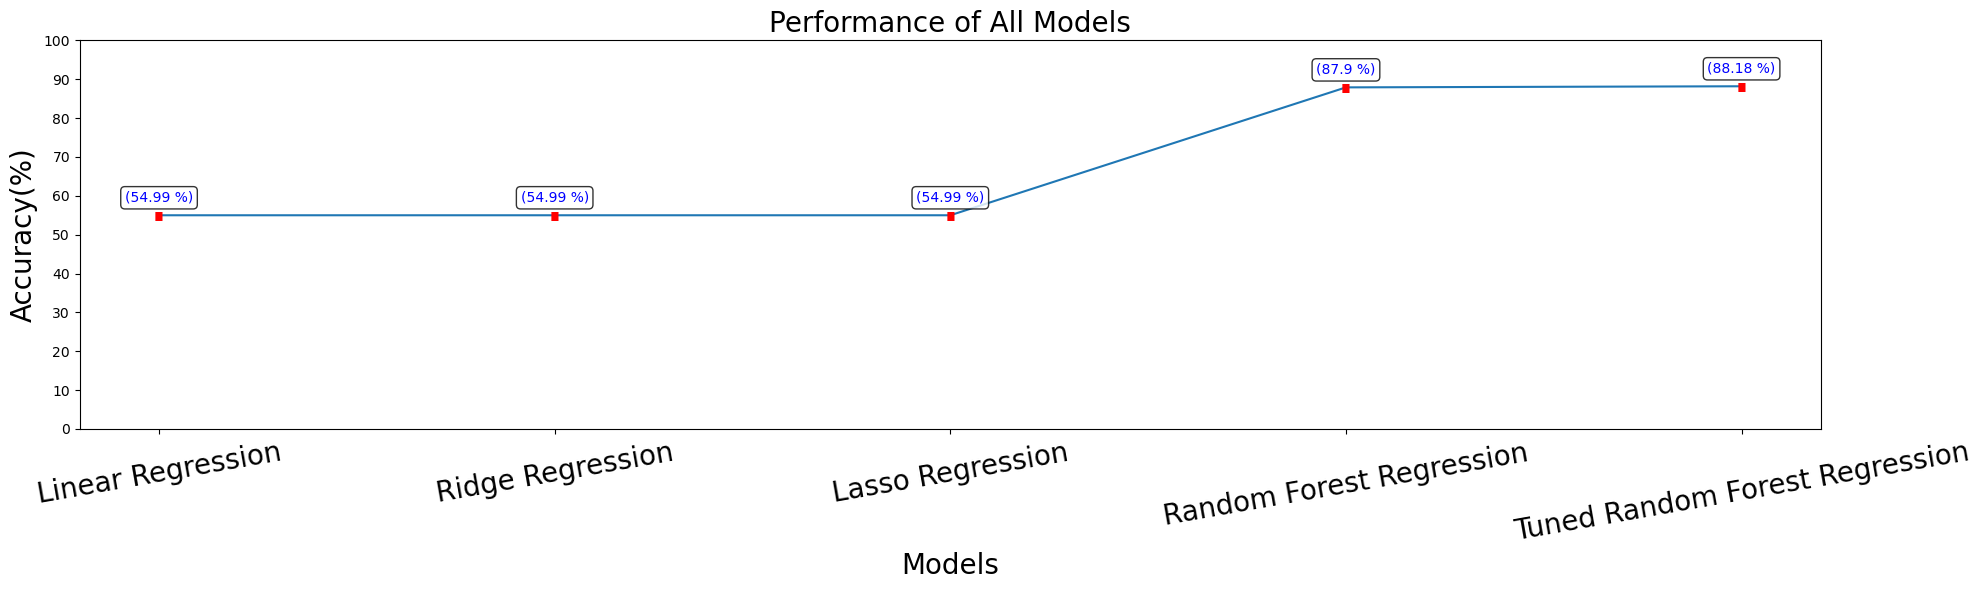

In [72]:
# Plot the performance of all the model used for prediction
x=list(range(len(model_accuracy)))
y=list(range(0,101,10))

props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_accuracy)
plt.yticks(y)
plt.xticks(fontsize=20)
plt.xticks(rotation = (10))
plt.xlabel("Models",fontsize=20)
plt.ylabel("Accuracy(%)",fontsize=20)
plt.title("Performance of All Models",fontsize=20)
for i,j in zip(x,y):
    j = model_accuracy[i]
    val = "(" + str(round(model_accuracy[i],2)) + " %)"
    plt.text(i, j+4.5, val,horizontalalignment='center',verticalalignment='center',color='blue',bbox=props)
    plt.text(i, j+3.5, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.tight_layout()
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

**Observations and Model Selection**
* After creating four models, Random Forest Regression Model provided the best accuracy.
* The other 3 models provided almost same accuracy of ~55%, compared to ~88% accuracy of Random Forest Regression Model.

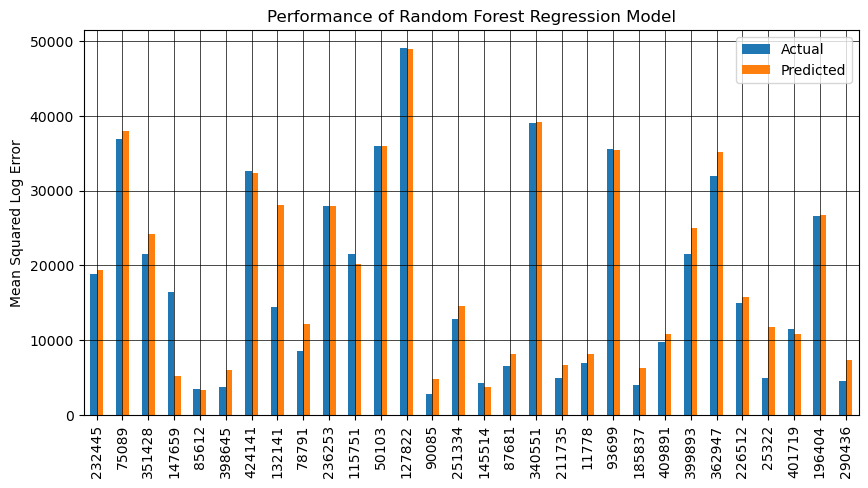

In [73]:
# Plot the Actual vs Predict price for Random Forest Regression Model
df_evaluate = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_bm})
df_evaluate = df_evaluate.sample(30)
df_evaluate.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.title('Performance of Random Forest Regression Model')
plt.ylabel('Mean Squared Log Error')
plt.show()

In [74]:
# Create features importance dataframe, sort them by order of higher importance
feature_names = []
feature_importances = []
for name, importance in zip(X, best_model.feature_importances_):
    feature_names.append(name)
    feature_importances.append(round(importance * 100, 2))

features = pd.DataFrame({'Features':feature_names, 'Importance (%)':feature_importances})
features.sort_values(by='Importance (%)', ascending=False)

,Features,Importance (%)
12,year,44.26
13,odometer,14.55
5,cylinders,12.68
6,fuel,6.15
2,manufacturer,5.64
10,type,3.76
3,model,2.64
1,state,2.32
0,region,2.23
11,paint_color,1.49


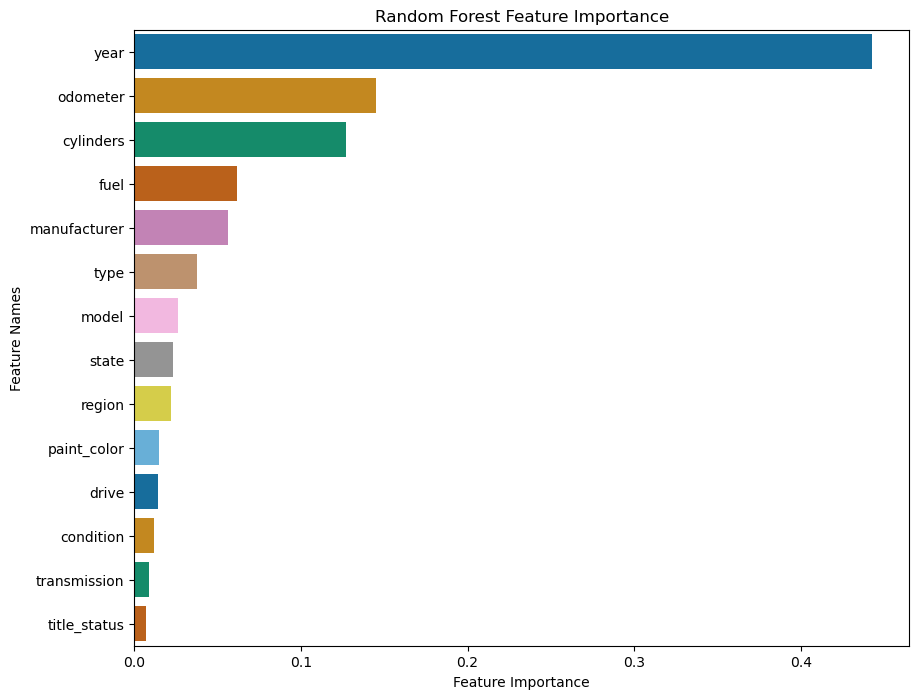

In [75]:
# Plot the Important Features for visual interpretation
def plot_feature_importance(importance,names,model_type):

    # Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    # Create a DataFrame using a Dictionary of features names and their importance factors
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    # Sort the DataFrame in order of the importance of the features
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    # Define size of the plot
    plt.figure(figsize=(10,8))
    # Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'], 
                palette = 'colorblind')
    # Add chart labels
    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')


plot_feature_importance(RFR_model.feature_importances_,X.columns,'Random Forest')

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

### Final Findings (Includes Technical Details)

* The data was reviewed, transformed, cleaned and scaled before proceeding with preparation of the model to predict the used vehicle prices.
* Multiple Machine Learning algorithms were tried before arriving at the best model. The best model emerged using the Random Forest Regression after tuning the hyper-parameters, that can predict used vehicle prices with ~88% accuracy. 
* Feature Importance technique was used to find the important features that were most useful in predicting the target variable (Price). The year of the vehicle is by far the main factor when calculating the price with almost a 44%, followed by the odometer showing importance of ~15%.
* Surprisingly number of cylinders palyed more important role in defining the model compared to manufacturer and model of the cars.
* It seems the region/state also plays a part, which totally makes sense. For example - Specialised cars like sport or convertibles would be a better fit in warmer regions compared to bigger trucks and SUVs that might be more popular in colder places.

### Recommendations to the Used Car Dealers
* Diesels car with 'like new' and 'excellent' conditions are likely to fetch higher price.
* Cars with odometer reading between 0 and 60K miles usually fetch almost double price compared to cars with 90K and above miles.
* Cars with title status other than clean and lien are least preferred by potential buyers.
* Ford-150 is the most sold model among used cars. Ford manufacturer in general is most popular among used car buyers.
* It is recommended to stock the cars according to region/state popularity. For example - certain models might be more popular in Florida (warm state) vs Minnesota (cold state).
* Correct price tag is the key to sell an used car. Mastering the pricing of used cars is not an easy job. Price prediction model can help but it still requires some discretion by the car pricing experts.
* As per current prediction model, the top 5 most important features are:
    * Year **42.26%** 
        * Keep more newer cars in the inventory
    * Odometer **14.55%** 
        * Keep cars with low odometer reading, i.e. less than 60K miles, in the inventory
    * Cylinders **12.68%** 
        * Keep cars with higher number of cylinders, i.e. 6-10 cylinders, in the inventory
    * Fuel Type **6.15%** 
        * Keep more cars with fuel type diesel and electric in the inventory
    * Manufacturer **5.64%** 
        * Keep more cars from popular manufacturer like Ford and Chevrolet in the inventory
* The best model predicted the price of a used car with 88% accuracy. This information can have an enormous value for both companies and individuals when trying to understand how to estimate the value of a vehicle and, more importantly, the key factors that determine its pricing.

### Next Steps

* There are other predictive models that can be tried to find even a better model.
* The current model can be further tuned to find better hyper-parameters value.
* Data transformation, cleaning (EDA) can be revisited to improve data quality.